In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/sample_data/Iris.csv')
x=['SepalLengthCm','SepalWidthCm','PetalLengthCm']
y=['PetalWidthCm']
X=data[x]
Y=data[y]
data
X
Y

,PetalWidthCm
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2
...,...
145,2.3
146,1.9
147,2.0
148,2.3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


From the boxplot, it is visible that only sepal width is having the outlier, whereas sepallength, petallength, petalwidth having datapoints within min and maxrange.
It is visible that values in sepallength and sepalwidth are tightly distributed and IQ range is small, whereas in petallength and petalwidth the values are distibuted widely,so IQ range are high.


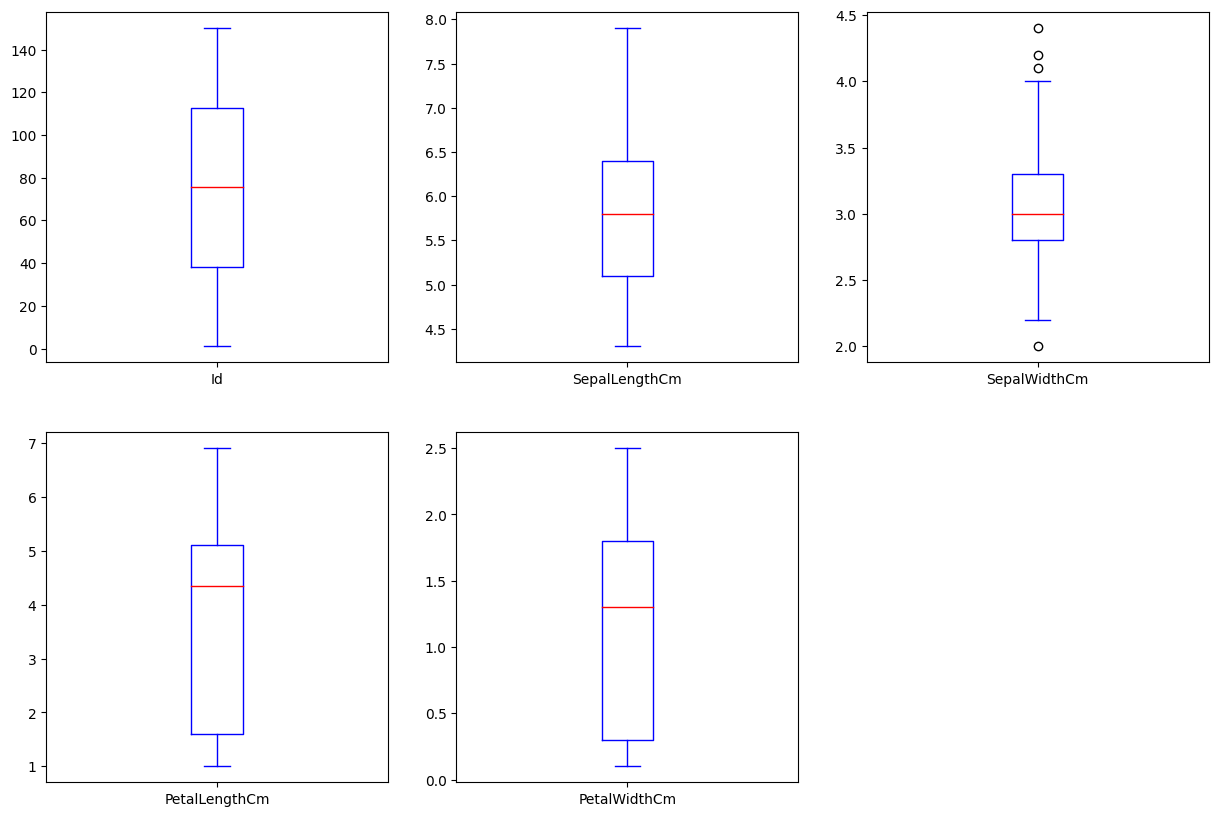

In [ ]:
boxplot=data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, colormap='bwr', figsize=(15,10))
print('From the boxplot, it is visible that only sepal width is having the outlier, whereas sepallength, petallength, petalwidth having datapoints within min and maxrange.')
print('It is visible that values in sepallength and sepalwidth are tightly distributed and IQ range is small, whereas in petallength and petalwidth the values are distibuted widely,so IQ range are high.')

<ipython-input-8-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

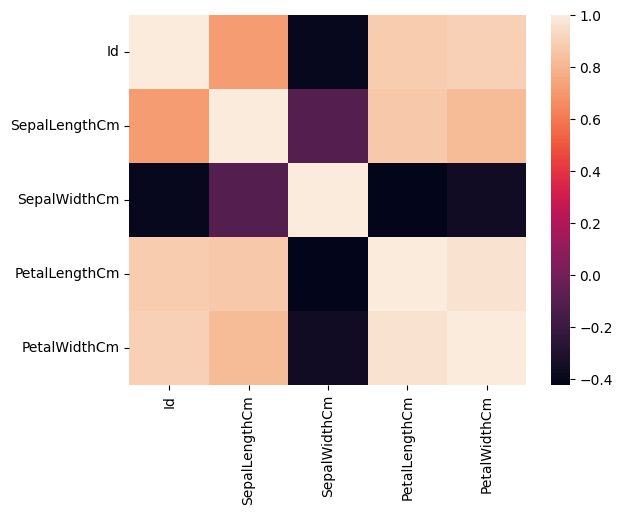

In [ ]:
sns.heatmap(data.corr())


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([[1.87729872],
       [1.13337227],
       [0.24784788],
       [2.20028844],
       [0.25847512],
       [2.34014729],
       [0.17146304],
       [1.52236027],
       [1.49561131],
       [1.22638264],
       [2.03772545],
       [1.50205551],
       [1.59815185],
       [1.45609886],
       [1.61735954],
       [0.22308783],
       [1.53337554],
       [1.53382146],
       [0.17300603],
       [0.1593507 ],
       [1.8155505 ],
       [1.64152633],
       [0.51538622],
       [0.24274143],
       [1.62902596],
       [0.12028417],
       [0.52550966],
       [1.38268422],
       [1.0031685 ],
       [0.31158501],
       [2.01394669],
       [1.68599788],
       [0.23321126],
       [1.74278701],
       [2.00943351],
       [1.35418704],
       [0.28587524],
       [1.81361948],
       [1.41548934],
       [1.25467458],
       [1.9057959 ],
       [0.18054729],
       [1.69032827],
       [0.3307927 ],
       [0.2271551 ],
       [1.0517652 ],
       [1.97250323],
       [2.091

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

[-0.07944591]
[[-0.22235775  0.1920769   0.53109887]]


In [ ]:
print('sepalwidth = -0.22235775*SepalLengthCm + 0.1920769*SepalWidthCm + 0.53109887*PetalLengthCm -0.07944591')

sepalwidth = -0.22235775*SepalLengthCm + 0.1920769*SepalWidthCm + 0.53109887*PetalLengthCm -0.07944591


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 3)
(100, 1)
(50, 3)
(50, 1)


In [ ]:
print ('R-Squared for training dataset model:', regressor.score(X_train,y_train))

R-Squared for training dataset model: 0.9515404899395362


In [ ]:
pred_df=pd.DataFrame(y_test-y_pred)
pred_df

,PetalWidthCm
114,0.522701
62,-0.133372
33,-0.047848
107,-0.400288
7,-0.058475
100,0.159853
40,0.128537
86,-0.022360
76,-0.095611
71,0.073617


In [ ]:
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.1647182515152378
MSE: 0.04952702668495475
RMSE: 0.22254668428209562


In [ ]:
print(metrics.r2_score(y_test,y_pred))

0.9037816925861903


In [ ]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 90.38


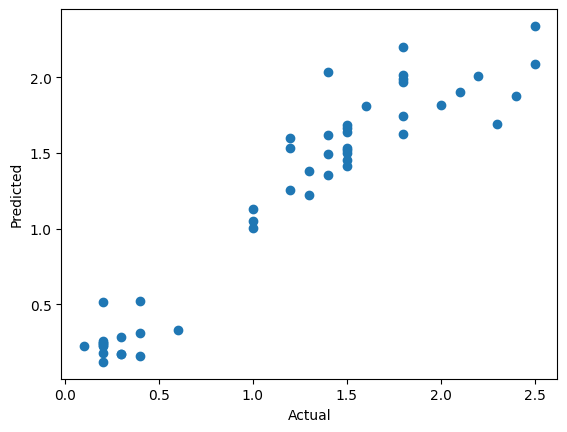

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

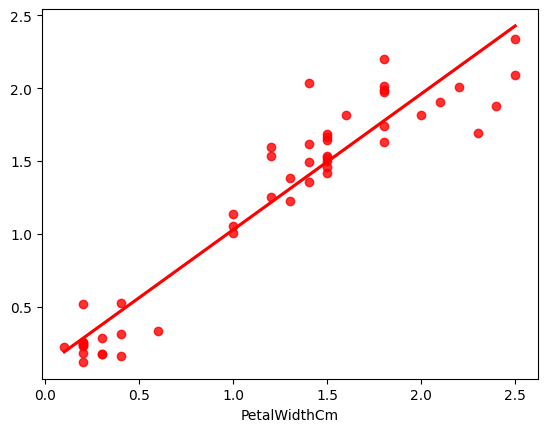

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

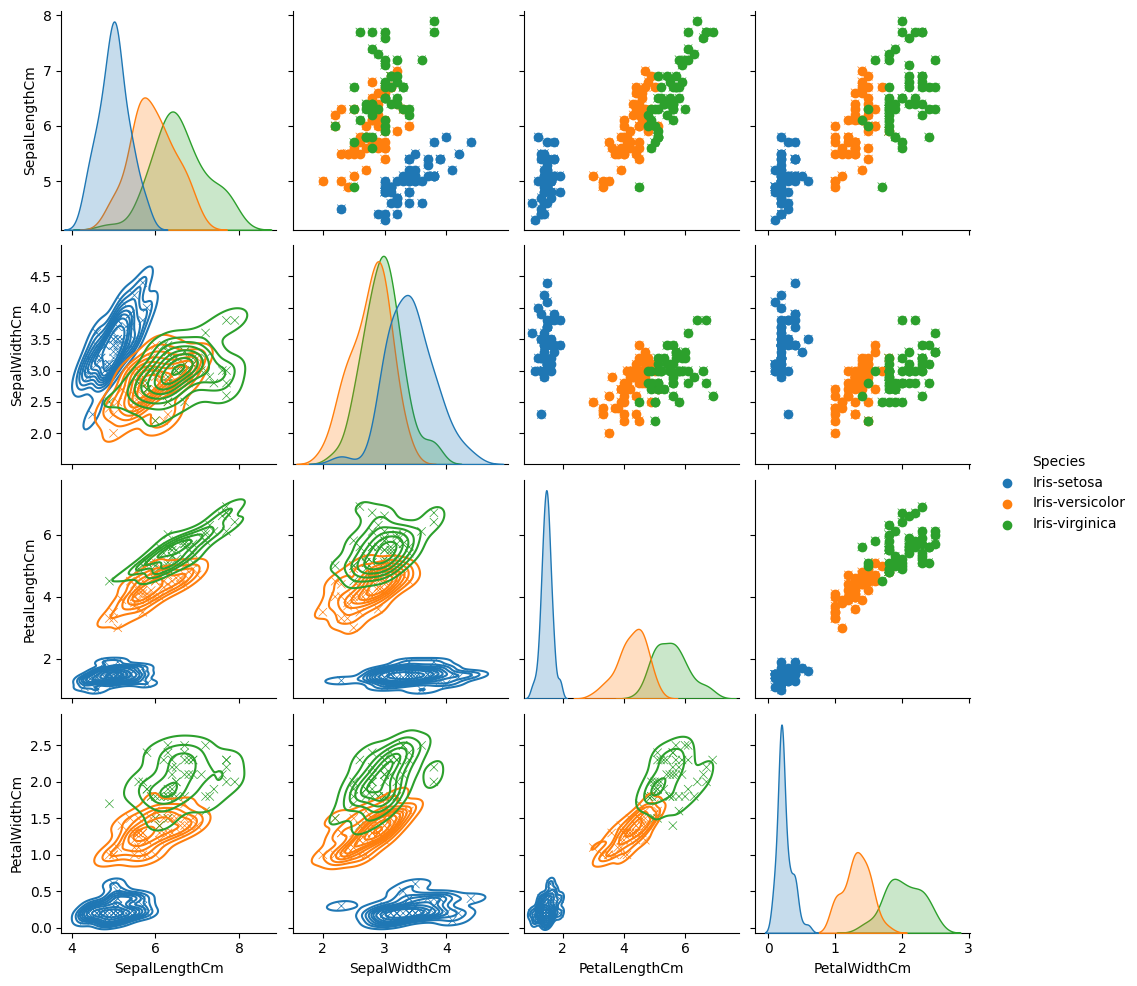

In [ ]:
snsdata = data.drop(['Id'], axis=1)
g = sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)